In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
fid = drive.ListFile({'q':"title='archive.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('archive.zip')

In [7]:
f.keys()


dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [8]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [9]:
PATH = '/'

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_dir = os.path.join(PATH,
                         'content')
train_image_dir=os.path.join(train_dir,
                                'Images')

In [12]:
len(os.listdir(train_dir))

7

In [13]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
batch_size = 32

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [16]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [17]:
len(os.listdir(train_image_dir))

8091

In [18]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 9160 images belonging to 4 classes.


In [19]:
sample_training_images, _ = next(train_data_gen)

In [20]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
def plotImages(images_arr):
    a = Image.fromarray(images_arr[0])
    cv2_imshow(a)

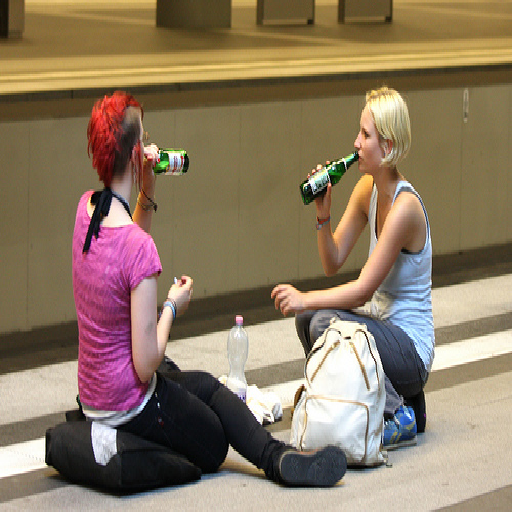

In [21]:
a=sample_training_images[1]*255
a = a.astype(np.uint8)
#Displayed the image
rgb_image = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_image)

In [22]:
caption_path = '/content/captions.txt'


In [23]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [24]:
captions


['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow wi

In [25]:
from glob import glob
path2 = '/content/Images/'
images = glob(path2+'*.jpg')
len(images)

8091

In [26]:
train_image_dir

'/content/Images'

In [27]:
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [28]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [29]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [30]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0] 
        print(img_name)
        caption = i.split(',')[1]
        #print(caption)
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

Streaming output truncated to the last 5000 lines.
378453580_21d688748e.jpg
378453580_21d688748e.jpg
378453580_21d688748e.jpg
378453580_21d688748e.jpg
379006645_b9a2886b51.jpg
379006645_b9a2886b51.jpg
379006645_b9a2886b51.jpg
379006645_b9a2886b51.jpg
379006645_b9a2886b51.jpg
380034515_4fbdfa6b26.jpg
380034515_4fbdfa6b26.jpg
380034515_4fbdfa6b26.jpg
380034515_4fbdfa6b26.jpg
380034515_4fbdfa6b26.jpg
380041023_0dfd712ef1.jpg
380041023_0dfd712ef1.jpg
380041023_0dfd712ef1.jpg
380041023_0dfd712ef1.jpg
380041023_0dfd712ef1.jpg
380515798_c2abbf46b0.jpg
380515798_c2abbf46b0.jpg
380515798_c2abbf46b0.jpg
380515798_c2abbf46b0.jpg
380515798_c2abbf46b0.jpg
380527679_574749123d.jpg
380527679_574749123d.jpg
380527679_574749123d.jpg
380527679_574749123d.jpg
380527679_574749123d.jpg
380537190_11d6c0a412.jpg
380537190_11d6c0a412.jpg
380537190_11d6c0a412.jpg
380537190_11d6c0a412.jpg
380537190_11d6c0a412.jpg
380590140_25b9889772.jpg
380590140_25b9889772.jpg
380590140_25b9889772.jpg
380590140_25b9889772.jpg

In [31]:
captions_dict

{'101669240_b2d3e7f17b.jpg': ['A man in a hat is displaying pictures next to a skier in a blue hat .',
  'A man skis past another man displaying paintings in the snow .',
  'A person wearing skis looking at framed pictures set up in the snow .',
  'A skier looks at framed pictures in the snow next to trees .',
  'Man on skis looking at artwork for sale in the snow'],
 '1028205764_7e8df9a2ea.jpg': ['A man and a baby are in a yellow kayak on water .',
  'A man and a little boy in blue life jackets are rowing a yellow canoe .',
  'A man and child kayak through gentle waters .',
  'A man and young boy ride in a yellow kayak .',
  'Man and child in yellow kayak'],
 '1030985833_b0902ea560.jpg': ['A black dog and a brown dog are jumping up to catch a red toy .',
  'A black dog and a brown dog play with a red toy on a courtyard .',
  'A brown and black lab are outside and the black lab is catching a toy in its mouth .',
  'Black dog snaps at red and black object as brown dog lunges .',
  'The 

In [32]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [33]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [34]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [35]:
len(count_words)


4022

In [36]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [37]:
len(new_dict)

4022

In [38]:
new_dict['<OUT>'] = len(new_dict) 

In [39]:
captions_backup = captions_dict.copy()

In [40]:
captions_dict = captions_backup.copy()

In [41]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [42]:
captions_dict

{'101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   2,
   11,
   4,
   2,
   12,
   5,
   13,
   14],
  [1, 2, 3, 15, 16, 17, 3, 7, 18, 4, 19, 20, 13, 14],
  [1, 2, 21, 22, 15, 23, 24, 25, 8, 26, 27, 4, 19, 20, 13, 14],
  [1, 2, 11, 28, 24, 25, 8, 4, 19, 20, 9, 10, 29, 13, 14],
  [1, 3, 30, 15, 23, 24, 31, 32, 33, 4, 19, 20, 14]],
 '1028205764_7e8df9a2ea.jpg': [[1,
   2,
   3,
   34,
   2,
   35,
   36,
   4,
   2,
   37,
   38,
   30,
   39,
   13,
   14],
  [1, 2, 3, 34, 2, 40, 41, 4, 12, 42, 43, 36, 44, 2, 37, 45, 13, 14],
  [1, 2, 3, 34, 46, 38, 47, 48, 49, 13, 14],
  [1, 2, 3, 34, 50, 41, 51, 4, 2, 37, 38, 13, 14],
  [1, 3, 34, 46, 4, 37, 38, 14]],
 '1030985833_b0902ea560.jpg': [[1,
   2,
   52,
   53,
   34,
   2,
   54,
   53,
   36,
   55,
   27,
   10,
   56,
   2,
   57,
   58,
   13,
   14],
  [1, 2, 52, 53, 34, 2, 54, 53, 59, 60, 2, 57, 58, 30, 2, 61, 13, 14],
  [1,
   2,
   54,
   34,
   52,
   62,
   36,
   63,
   34,
   19,
 

In [43]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [44]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 10, 2, 11, 4, 2, 12, 5, 13, 14]
[1, 2, 54, 34, 52, 62, 36, 63, 34, 19, 52, 62, 6, 64, 2, 58, 4, 65, 66, 13, 14]
[1, 19, 71, 62, 72, 73, 74, 10, 75, 19, 58, 69, 19, 52, 62, 76, 77, 4, 19, 78, 13, 14]
[1, 2, 41, 4, 2, 57, 278, 282, 6, 226, 122, 283, 4, 122, 233, 284, 285, 190, 84, 2, 281, 13, 14]
[1, 2, 3, 4, 2, 52, 270, 34, 331, 332, 333, 2, 328, 4, 52, 334, 34, 2, 335, 270, 4, 83, 84, 2, 330, 189, 60, 336, 274, 337, 13, 14]
[1, 2, 3, 277, 4, 52, 34, 226, 2, 1254, 4, 122, 402, 6, 274, 30, 2, 327, 94, 2, 1255, 574, 1256, 32, 1257, 10, 2, 165, 1258, 10, 1162, 732, 13, 14]


In [45]:
MAX_LEN

34

In [46]:
captions_dict

{'101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   2,
   11,
   4,
   2,
   12,
   5,
   13,
   14],
  [1, 2, 3, 15, 16, 17, 3, 7, 18, 4, 19, 20, 13, 14],
  [1, 2, 21, 22, 15, 23, 24, 25, 8, 26, 27, 4, 19, 20, 13, 14],
  [1, 2, 11, 28, 24, 25, 8, 4, 19, 20, 9, 10, 29, 13, 14],
  [1, 3, 30, 15, 23, 24, 31, 32, 33, 4, 19, 20, 14]],
 '1028205764_7e8df9a2ea.jpg': [[1,
   2,
   3,
   34,
   2,
   35,
   36,
   4,
   2,
   37,
   38,
   30,
   39,
   13,
   14],
  [1, 2, 3, 34, 2, 40, 41, 4, 12, 42, 43, 36, 44, 2, 37, 45, 13, 14],
  [1, 2, 3, 34, 46, 38, 47, 48, 49, 13, 14],
  [1, 2, 3, 34, 50, 41, 51, 4, 2, 37, 38, 13, 14],
  [1, 3, 34, 46, 4, 37, 38, 14]],
 '1030985833_b0902ea560.jpg': [[1,
   2,
   52,
   53,
   34,
   2,
   54,
   53,
   36,
   55,
   27,
   10,
   56,
   2,
   57,
   58,
   13,
   14],
  [1, 2, 52, 53, 34, 2, 54, 53, 59, 60, 2, 57, 58, 30, 2, 61, 13, 14],
  [1,
   2,
   54,
   34,
   52,
   62,
   36,
   63,
   34,
   19,
 

In [47]:
VOCAB_SIZE =len(count_words)
def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [48]:
X, y_in, y_out = generator(images_features, captions_dict)

In [49]:
count_words


{'startofseq': 7499,
 'a': 11033,
 'man': 1299,
 'in': 3451,
 'hat': 113,
 'is': 1708,
 'displaying': 1,
 'pictures': 15,
 'next': 123,
 'to': 575,
 'skier': 37,
 'blue': 388,
 '.': 6356,
 'endofseq': 7499,
 'skis': 16,
 'past': 23,
 'another': 201,
 'paintings': 1,
 'the': 3368,
 'snow': 304,
 'person': 292,
 'wearing': 506,
 'looking': 103,
 'at': 466,
 'framed': 3,
 'set': 21,
 'up': 217,
 'looks': 85,
 'trees': 25,
 'on': 1933,
 'artwork': 1,
 'for': 189,
 'sale': 0,
 'and': 1463,
 'baby': 72,
 'are': 642,
 'yellow': 229,
 'kayak': 22,
 'water': 494,
 'little': 327,
 'boy': 656,
 'life': 8,
 'jackets': 10,
 'rowing': 1,
 'canoe': 10,
 'child': 278,
 'through': 386,
 'gentle': 0,
 'waters': 7,
 'young': 468,
 'ride': 50,
 'black': 816,
 'dog': 1567,
 'brown': 456,
 'jumping': 293,
 'catch': 85,
 'red': 500,
 'toy': 108,
 'play': 142,
 'with': 1335,
 'courtyard': 8,
 'lab': 8,
 'outside': 141,
 'catching': 10,
 'its': 166,
 'mouth': 174,
 'snaps': 0,
 'object': 37,
 'as': 136,
 'lung

In [50]:
len(X), len(y_in), len(y_out)

(91794, 91794, 91794)

In [51]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [52]:
X.shape, y_in.shape, y_out.shape

((91794, 2048), (91794, 34), (91794, 4023))

In [53]:
X[1510]

array([0.5371662 , 2.7178593 , 0.        , ..., 0.4323379 , 0.07640843,
       1.0909731 ], dtype=float32)

In [54]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [56]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 34, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           514944    
                                                                 
 lstm (LSTM)                 (None, 34, 256)           394240    
                            

In [58]:
model.fit([X, y_in], y_out, batch_size=512, epochs=20)

Epoch 1/20
 26/180 [===>..........................] - ETA: 14:39 - loss: 2.2509 - accuracy: 0.4958

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-c082a73f71d9>", line 1, in <module>
    model.fit([X, y_in], y_out, batch_size=512, epochs=20)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1216, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 910, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 942, in _call
    

KeyboardInterrupt: ignored

In [59]:
inv_dict = {v:k for k, v in new_dict.items()}

In [60]:
model.save('model.h5')

In [61]:
model.save_weights('mine_model_weights.h5')

In [62]:
np.save('vocab.npy', new_dict)

In [65]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

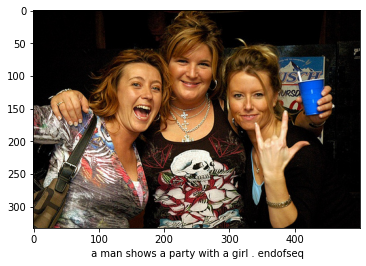

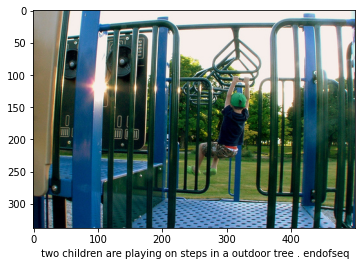

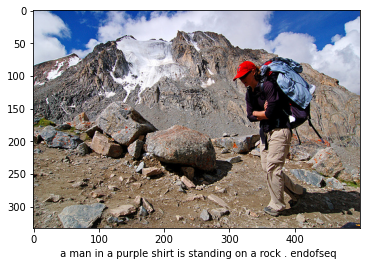

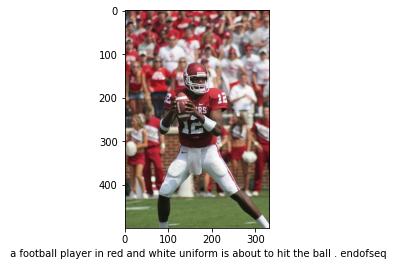

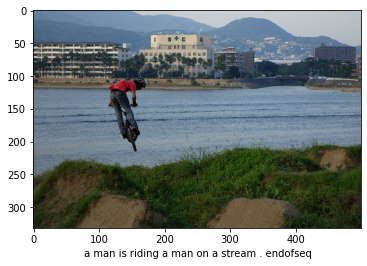

In [66]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)